# Correlation between entropy/FD metrics

Requires the [seaborn](https://seaborn.pydata.org/) and [pingouin](https://raphaelvallat.github.io/pingouin/build/html/index.html) packages.

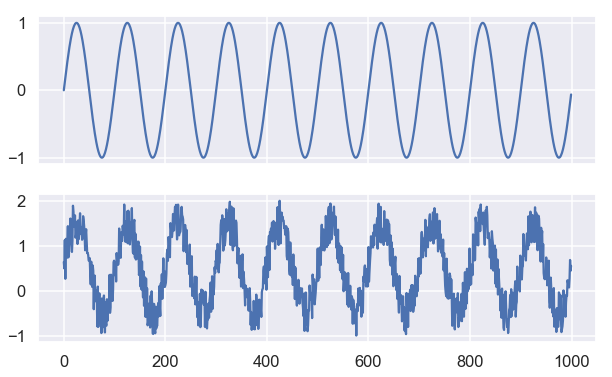

In [1]:
from entropy import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='talk')

df = pd.DataFrame()

# Generate 1000 1Hz sines with increasing noise
np.random.seed(123)
N = 1000
sf = 100
n_sines = 100
noises_factor = np.linspace(0, 1, n_sines)
noises = np.random.rand(n_sines, N)
sines = np.zeros(shape=(n_sines, N))
for i in range(n_sines):
    sines[i] = np.sin(2 * np.pi * np.arange(N) / sf) + noises_factor[i] * noises[i, :]
    
# Plot the first and last sines
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=False)
ax1.plot(sines[0])
ax2.plot(sines[-1])

In [2]:
# Compute the entropy metrics
for i in range(n_sines):
    df = df.append({'perm_ent': perm_entropy(sines[i], order=3, normalize=True),
                        'svd_ent' : svd_entropy(sines[i], order=3, normalize=True),
                        'spec_ent' : spectral_entropy(sines[i], sf, method='welch', normalize=True),
                        'app_ent': app_entropy(sines[i], order=2),
                        'samp_ent': sample_entropy(sines[i], order=2),
                        'petrosian_fd': petrosian_fd(sines[i]),
                        'katz_fd': katz_fd(sines[i])
                       }, 
                       ignore_index=True)

df

,app_ent,katz_fd,perm_ent,petrosian_fd,samp_ent,spec_ent,svd_ent
0,0.200446,2.145324,0.447237,1.001155,0.163998,0.184779,0.177294
1,0.201632,2.141333,0.482647,1.001959,0.164015,0.184847,0.192173
2,0.203127,2.144228,0.536770,1.003445,0.165197,0.184923,0.204147
3,0.211145,2.137527,0.610048,1.005823,0.168862,0.185038,0.213686
4,0.224220,2.147726,0.625656,1.006385,0.175752,0.185502,0.224054
5,0.233322,2.162591,0.678376,1.008396,0.179516,0.185815,0.233240
6,0.244138,2.161935,0.722438,1.010277,0.186753,0.186331,0.242270
7,0.255464,2.184233,0.785273,1.013340,0.196414,0.186716,0.256032
8,0.260081,2.202509,0.845586,1.016787,0.201311,0.187403,0.262959
9,0.265647,2.214672,0.864563,1.017958,0.206286,0.187987,0.274326


## Pairwise correlations

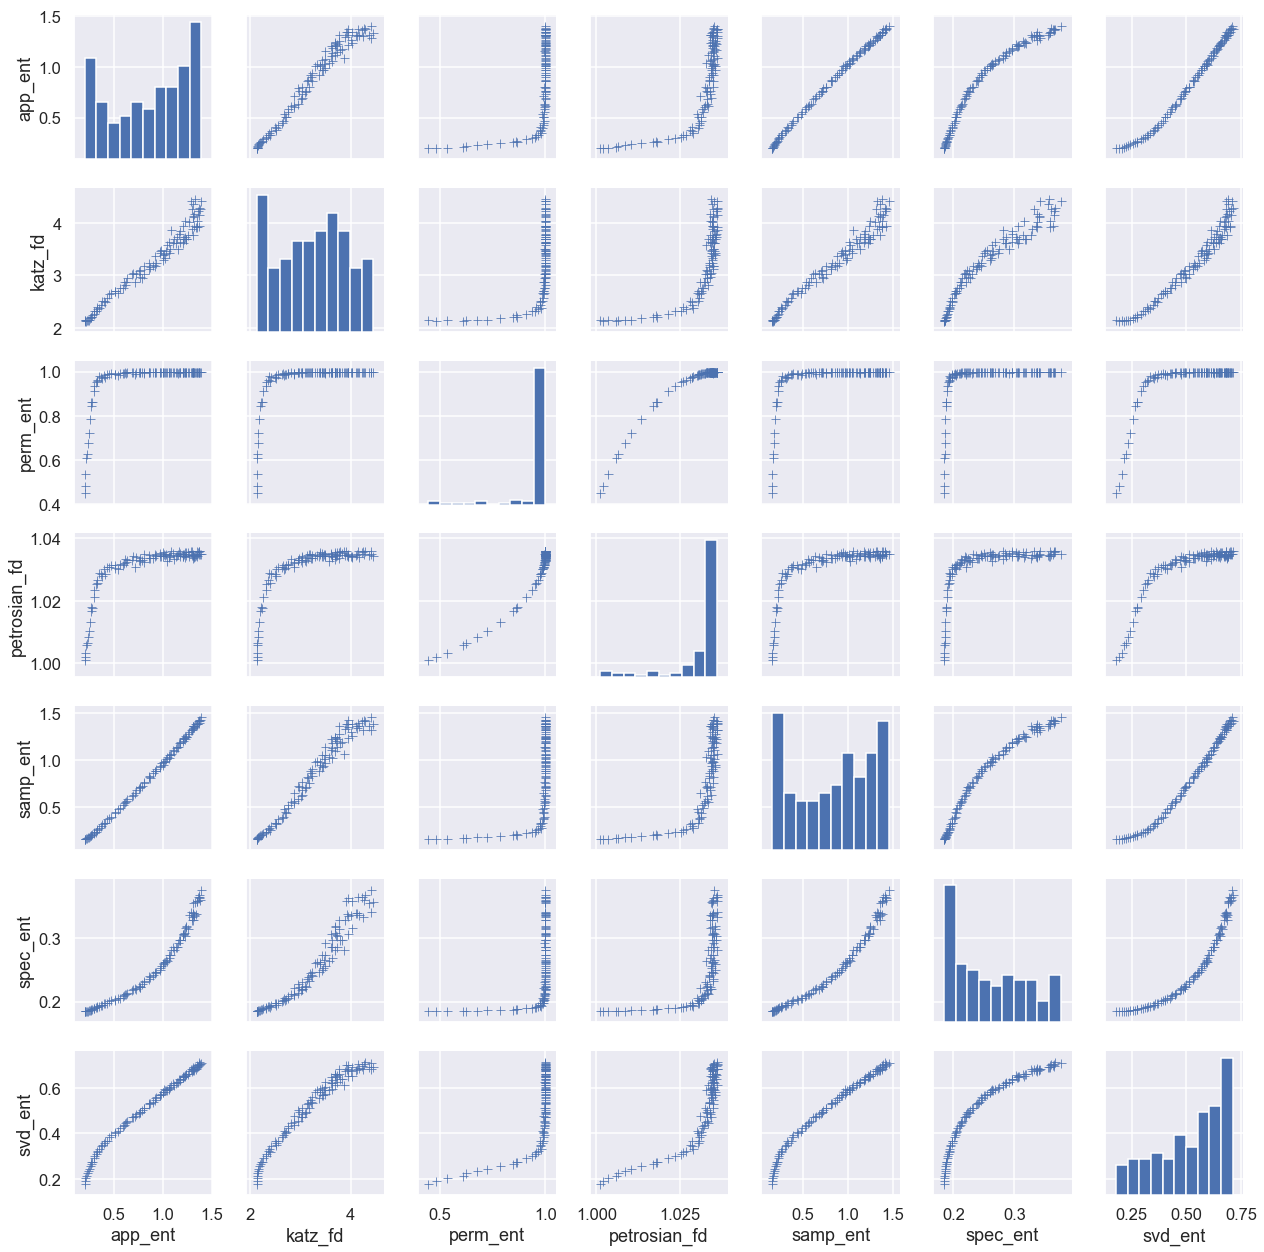

In [3]:
sns.pairplot(df, markers='+')

In [4]:
from pingouin import pairwise_corr
pairwise_corr(df).sort_values(by=['r2'], ascending=False)

,X,Y,method,tail,r,CI95%,r2,adj_r2,z,p-unc,BF10
3,app_ent,samp_ent,pearson,two-sided,0.999,"[1.0, 1.0]",0.998,0.998,3.800,6.866553e-131,4.646135e+126
5,app_ent,svd_ent,pearson,two-sided,0.991,"[0.99, 0.99]",0.983,0.983,2.700,2.248765e-88,3.879040e+84
19,samp_ent,svd_ent,pearson,two-sided,0.986,"[0.98, 0.99]",0.971,0.971,2.477,1.831064e-77,6.189555e+73
8,katz_fd,samp_ent,pearson,two-sided,0.983,"[0.98, 0.99]",0.967,0.966,2.380,3.952729e-74,3.108094e+70
0,app_ent,katz_fd,pearson,two-sided,0.981,"[0.97, 0.99]",0.963,0.963,2.323,3.705692e-72,3.477923e+68
10,katz_fd,svd_ent,pearson,two-sided,0.973,"[0.96, 0.98]",0.947,0.946,2.146,1.976443e-64,7.880016e+60
18,samp_ent,spec_ent,pearson,two-sided,0.967,"[0.95, 0.98]",0.935,0.934,2.044,6.024500e-60,2.889894e+56
9,katz_fd,spec_ent,pearson,two-sided,0.961,"[0.94, 0.97]",0.923,0.921,1.959,2.968663e-56,6.435515e+52
4,app_ent,spec_ent,pearson,two-sided,0.956,"[0.94, 0.97]",0.914,0.912,1.897,5.063588e-54,3.993255e+50
11,perm_ent,petrosian_fd,pearson,two-sided,0.956,"[0.94, 0.97]",0.914,0.913,1.897,3.989041e-54,5.055550e+50


## Clustermap

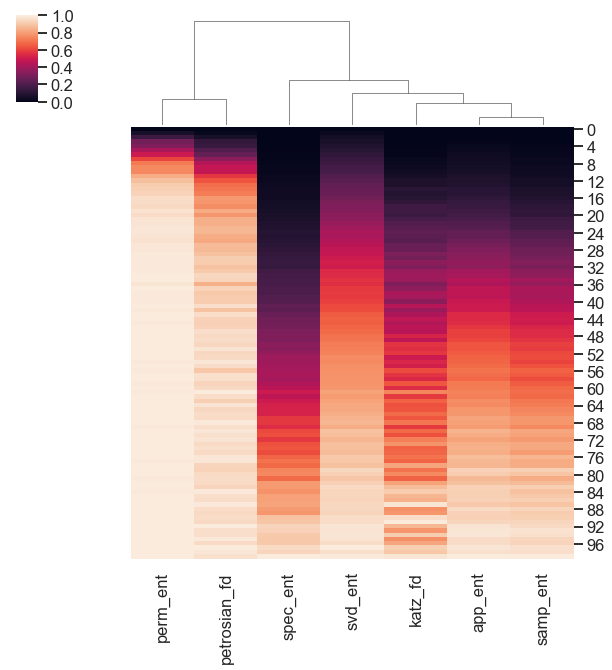

In [5]:
sns.clustermap(df, row_cluster=False, standard_scale=1)